In [1]:
import nibabel as nib
import numpy as np

C:\Users\ramui\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [13]:
data = nib.load("fa_S11.nii.gz")

In [15]:
print(data) #Generate image and metadata

<class 'nibabel.nifti1.Nifti1Image'>
data shape (96, 114, 94)
affine: 
[[-1.98707771e+00  1.45393256e-02 -1.64751615e-03  9.22537155e+01]
 [ 1.43547244e-02  2.01552129e+00 -3.08637228e-02 -1.23695442e+02]
 [-1.37368171e-03  3.01991571e-02  2.06066823e+00 -9.52807617e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'TE=95;sec=41400.64'
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  96 114  94   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       1.98713  2.0158   2.0609   0.       0.       0.       0.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units

In [16]:
image_data = data.get_fdata()


In [17]:
image_data.shape


(96, 114, 94)

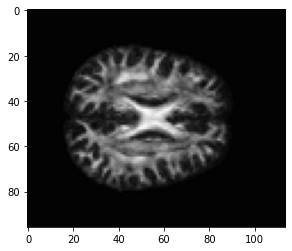

In [6]:
import matplotlib.pyplot as plt
plt.imshow(image_data[:,:,64], cmap="gray")  #Sample visualization

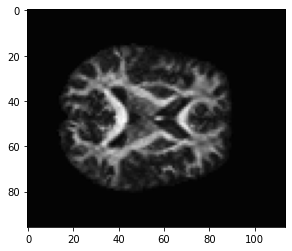

In [9]:
plt.imshow(image_data[:,:,56], cmap="gray")


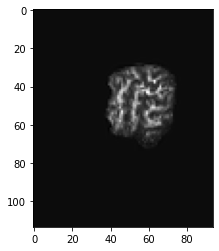

In [10]:
plt.imshow(image_data[20,:,:], cmap="gray") #Axial visualization


In [11]:
arr = []

In [18]:
arr += [image_data]

In [20]:
len(arr)

2

In [32]:
for i in range(9,10) :
    data = nib.load(f"fa_S{i}.nii.gz")
    img_data = data.get_fdata()
    arr += [img_data]

In [33]:
len(arr)

20

In [36]:
arr_out = np.vstack(np.expand_dims(arr,0))  #Create a batch of np tensors

In [37]:
arr_out.shape

(20, 96, 114, 94)

In [39]:
arr_out_b = np.expand_dims(arr_out , -1) #Get the extra dimension for color

In [40]:
arr_out_b.shape

(20, 96, 114, 94, 1)

In [38]:
import torch

In [43]:
x = torch.from_numpy(arr_out_b).float().view(-1,1,96,114,94) #Need to resize to BxCxHxW format

In [44]:
x.size()

torch.Size([20, 1, 96, 114, 94])

In [46]:
torch.save(x , 'trial_data.pt') #Save torch tensor